### This script is used to run the Holt-Winters Forecasting model for crop yield forecast


## Step 1: Importing relevant modules 

In [82]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # plotting data - matplotlib
import datetime 
import seaborn as sns

# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing



from sklearn import preprocessing

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

## Step 2: Get Data

                       WLP           PP
Planting_Date                          
2012-07-27     1054.179321  1054.179321
2012-07-28     1046.297716  1046.297716
2012-07-29     1047.721413  1047.721413
2012-07-30     1125.339227  1125.339227
2012-07-31     1124.212570  1124.212570


<AxesSubplot:title={'center':'Crop Yield Data from WOFOST Simulation'}, xlabel='Planting_Date'>

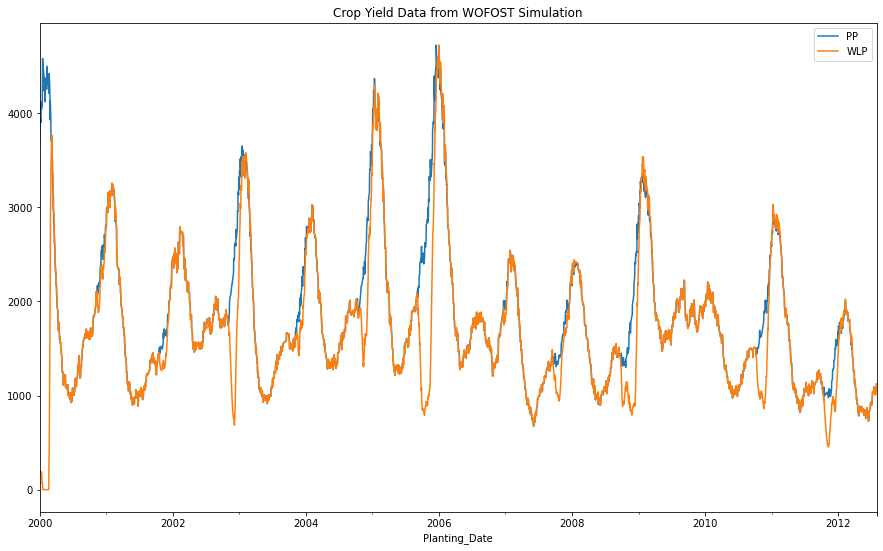

In [8]:
read_csv = os.path.join(os.getcwd(), 'data', 'forML','PPWLP09112021.csv')
vc_yieldWOFOST = pd.read_csv(read_csv, index_col='Planting_Date', parse_dates=True)
# Check the last values from the data obtained
print(vc_yieldWOFOST.tail())
# plotting the original data
vc_yieldWOFOST[['PP', 'WLP']].plot(title='Crop Yield Data from WOFOST Simulation' ,figsize=(15,9))

In [12]:
# Describe the data
print(vc_yieldWOFOST.describe())

# shape of the matrix
print("The shape of the matrix is: ") 
print( vc_yieldWOFOST.shape)


               WLP           PP
count  4596.000000  4596.000000
mean   1699.781477  1849.081955
std     734.889789   771.725097
min       0.000000   672.917768
25%    1159.886714  1313.909989
50%    1582.546133  1683.371570
75%    1974.844435  2162.899951
max    4727.108031  4724.782615
The shape of the matrix is: 
(4596, 2)


<AxesSubplot:ylabel='PP'>

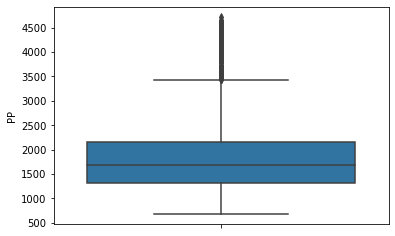

In [28]:
#Replace missing values with the mean values
vc_yieldWOFOST['PP'].fillna(value=vc_yieldWOFOST['PP'].mean, inplace=True)
vc_yieldWOFOST['WLP'].fillna(value=vc_yieldWOFOST['WLP'].mean, inplace=True)

#Outlier detection and treatment
sns.boxplot(y=vc_yieldWOFOST['PP'])


<AxesSubplot:ylabel='WLP'>

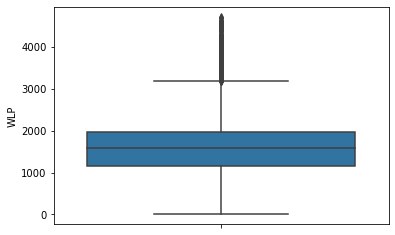

In [29]:

#Outlier detection and treatment
sns.boxplot(y=vc_yieldWOFOST['WLP'])

# Step 3: Build and Run the Holt-Winters Forecasting Model

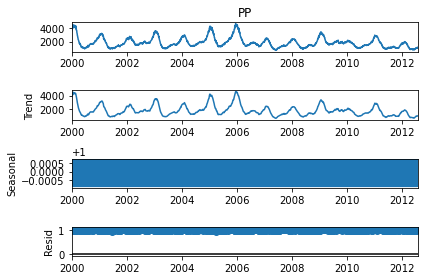

In [93]:
# Check for seasonality and trend
decompose_result = seasonal_decompose(vc_yieldWOFOST['PP'], model='multiplicative')
decompose_result.plot();

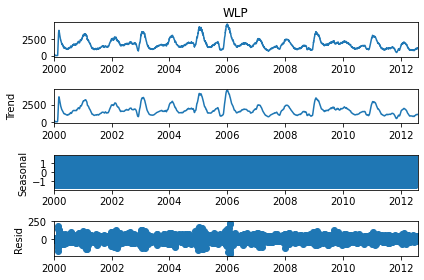

In [15]:
# Check for seasonality and trend
decompose_result = seasonal_decompose(vc_yieldWOFOST['WLP'])
decompose_result.plot();

In [78]:
# Set the frequency of the date time index as daily start as indicated by the data
vc_yieldWOFOST.index.freq = 'd'
# Set the value of Alpha and define m (Time Period)
m = 365
alpha = 1/(2*m)

C:\Users\KKiambe\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


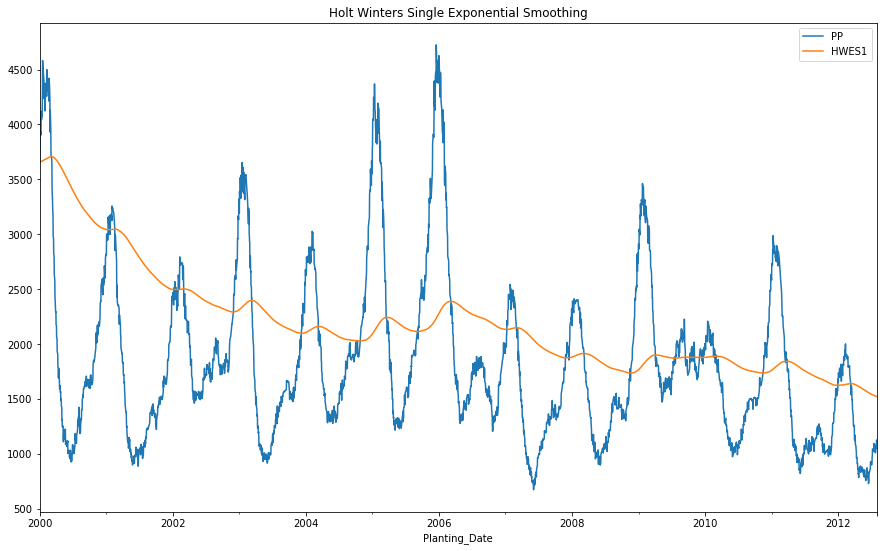

In [37]:
#Single Exponential Smoothing

vc_yieldWOFOST['HWES1'] = SimpleExpSmoothing(vc_yieldWOFOST['PP']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
vc_yieldWOFOST[['PP','HWES1']].plot(title='Holt Winters Single Exponential Smoothing' ,figsize=(15,9));

C:\Users\KKiambe\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


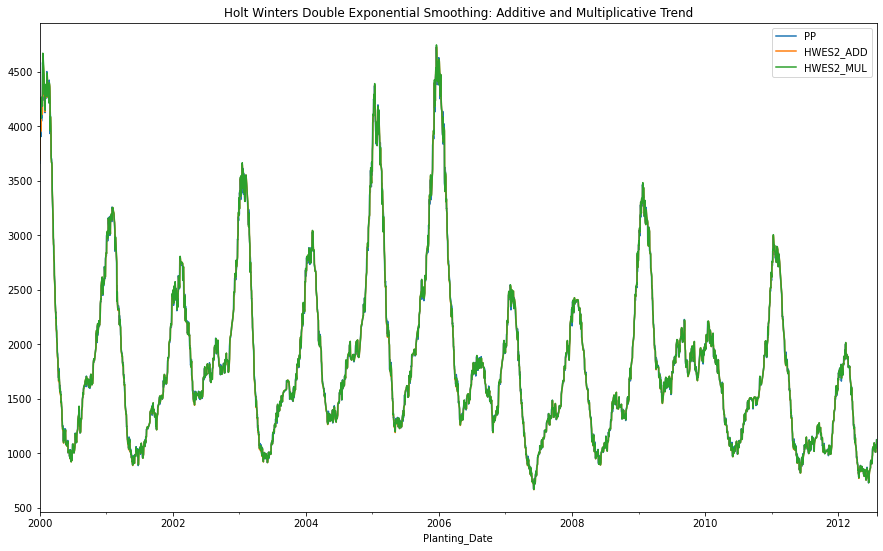

In [40]:
# Double Exponential Smoothing
vc_yieldWOFOST['HWES2_ADD'] = ExponentialSmoothing(vc_yieldWOFOST['PP'],trend='add').fit().fittedvalues
vc_yieldWOFOST['HWES2_MUL'] = ExponentialSmoothing(vc_yieldWOFOST['PP'],trend='mul').fit().fittedvalues
vc_yieldWOFOST[['PP','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend',figsize=(15,9));

C:\Users\KKiambe\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\KKiambe\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


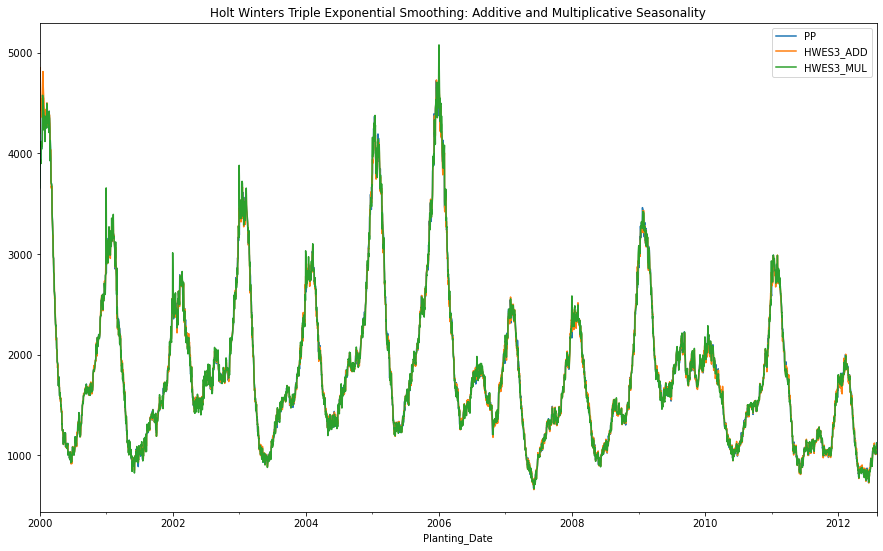

In [74]:
#Triple Exponential Smoothing

vc_yieldWOFOST['HWES3_ADD'] = ExponentialSmoothing(vc_yieldWOFOST['PP'],trend='add',seasonal='add',seasonal_periods=365).fit().fittedvalues
vc_yieldWOFOST['HWES3_MUL'] = ExponentialSmoothing(vc_yieldWOFOST['PP'],trend='mul',seasonal='mul',seasonal_periods=365).fit().fittedvalues
vc_yieldWOFOST[['PP','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality',figsize=(15,9));

C:\Users\KKiambe\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\KKiambe\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Crop Yield Train, Test and Predicted Test using Holt Winters')

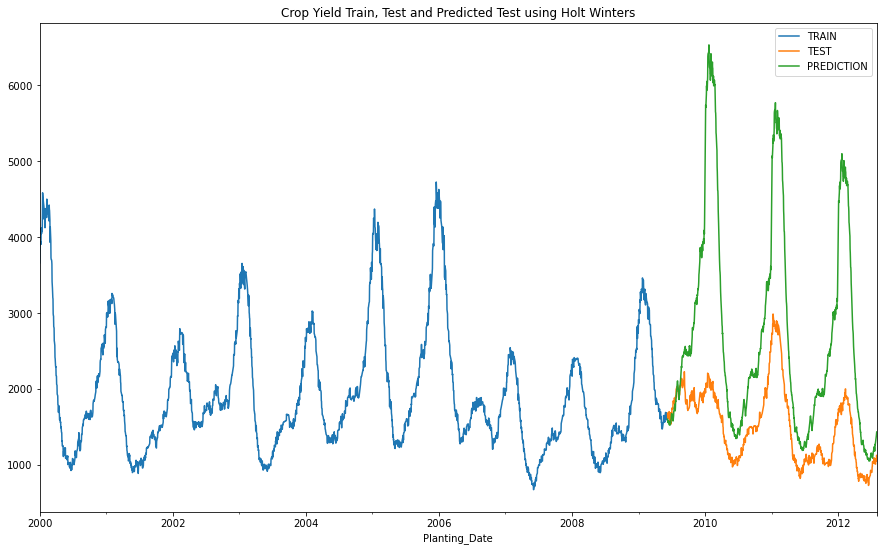

In [79]:
# Split into train and test set
train_vc_yieldWOFOST = vc_yieldWOFOST[:3447]
test_vc_yieldWOFOST = vc_yieldWOFOST[3447:]

fitted_model = ExponentialSmoothing(train_vc_yieldWOFOST['PP'],trend='mul',seasonal='mul',seasonal_periods=365).fit()
test_predictions = fitted_model.forecast(1149)
train_vc_yieldWOFOST['PP'].plot(legend=True,label='TRAIN')
test_vc_yieldWOFOST['PP'].plot(legend=True,label='TEST',figsize=(15,9))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Crop Yield Train, Test and Predicted Test using Holt Winters')

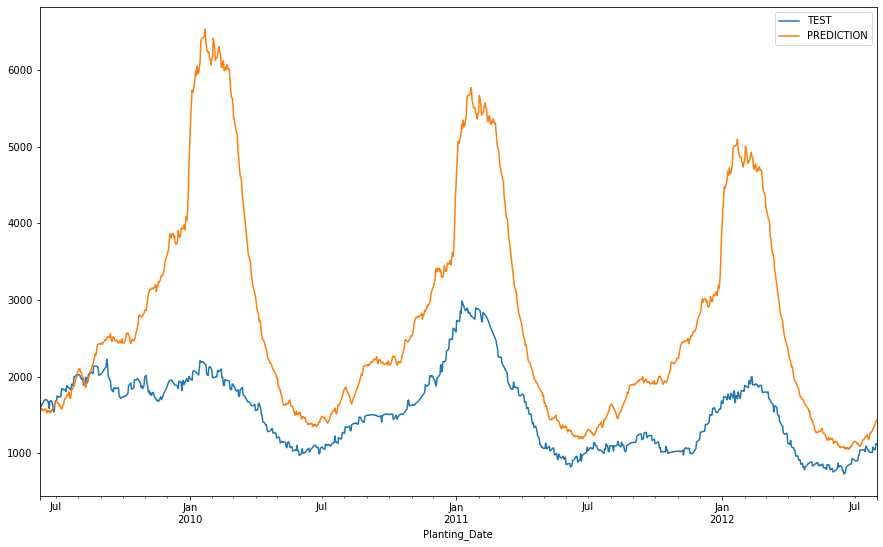

In [80]:
test_vc_yieldWOFOST['PP'].plot(legend=True,label='TEST',figsize=(15,9))
test_predictions.plot(legend=True,label='PREDICTION');

In [77]:
#For evaluation
print(f"Holt Winters Root Mean Squared Error = {sqrt(mean_squared_error(test_vc_yieldWOFOST['PP'], test_predictions))}")



Holt Winters Root Mean Squared Error = 1681.964203203303
